# Notebook 4: Introducción a Deep Learning

Aqui construiremos una **red neuronal simple** usando TensorFlow/Keras
para resolver un problema de **clasificación de dígitos escritos a mano**
(usando el dataset `digits`).

De acuerdo con las instrucciones dadas, se realizará:
- Definición y entrenamiento de una red neuronal.
- Visualización del proceso de entrenamiento (accuracy y loss).
- Evaluación del modelo en datos de prueba.


In [ ]:
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

!pip install seaborn plotly -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")



GPU disponible: []
Entorno configurado correctamente en Google Colab


## 2. Dataset: Reconocimiento de Dígitos (Digits)

Utilizamos el dataset `digits` de Scikit-learn, contiene imágenes
pequeñas de dígitos escritos a mano (del 0 al 9). Cada imagen tiene tamaño
8x8 píxeles y el objetivo es entrenar una red neuronal que sea capaz de
reconocer qué número representa cada imagen.


In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data       # 64 características (8x8 píxeles aplanados)
y = digits.target     # etiqueta 0-9

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)
print("Clases disponibles:", np.unique(y))

# Mostrar primeras filas como tabla
pd.DataFrame(X).head()


Dimensiones de X: (1797, 64)
Dimensiones de y: (1797,)
Clases disponibles: [0 1 2 3 4 5 6 7 8 9]


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### 3. Visualización de ejemplos del dataset

Previo a entrenar la red neuronal, es importante ver cómo son los datos.
Cada registro corresponde a una imagen 8x8 de un dígito escrito a mano.


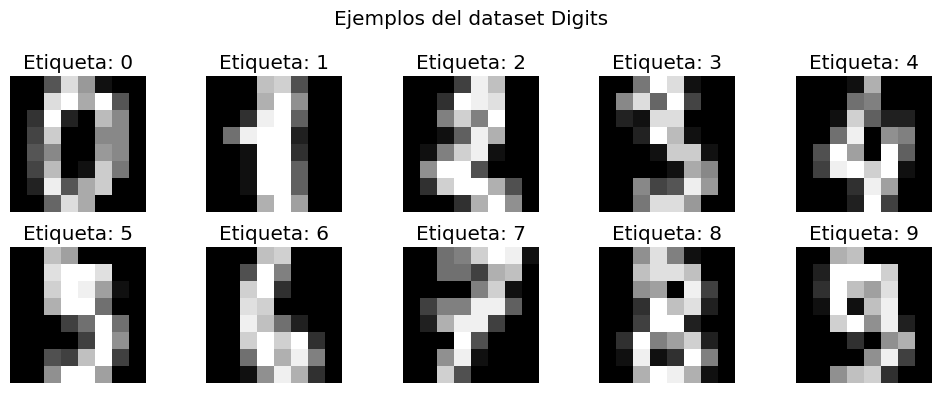

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Etiqueta: {digits.target[i]}")
    ax.axis('off')

plt.suptitle("Ejemplos del dataset Digits")
plt.tight_layout()
plt.show()


## 4. Preparación de los datos

En esta parte separamos el dataset en conjuntos de entrenamiento y prueba, y
normalizamos las características para ayudar a la red neuronal a converger
más rápido durante el entrenamiento.


In [ ]:
# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding de las etiquetas para Keras (clase 0-9)
num_clases = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes=num_clases)
y_test_cat = to_categorical(y_test, num_classes=num_clases)

X_train_scaled.shape, y_train_cat.shape


((1437, 64), (1437, 10))

## 5. Definición de la red neuronal

Construimos una red neuronal totalmente conectada (*Multilayer Perceptron*):
- Capa de entrada: 64 neuronas (una por píxel).
- Capa oculta: 64 neuronas con activación ReLU.
- Capa oculta opcional con Dropout para regularización.
- Capa de salida: 10 neuronas (una por cada dígito), con activación *softmax*.

La función de pérdida será `categorical_crossentropy` y el optimizador `adam`.


In [ ]:
# Definir el modelo secuencial
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_clases, activation='softmax')
])

# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,970 (35.04 KB)

 Trainable params: 8,970 (35.04 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Entrenamiento del modelo

Ahora debemos entrenar la red neuronal durante varias épocas, utilizando un
conjunto de validación para monitorear el desempeño mientras aprende.


In [ ]:
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2053 - loss: 2.2000 - val_accuracy: 0.7014 - val_loss: 1.3728
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7259 - loss: 1.1826 - val_accuracy: 0.7882 - val_loss: 0.7913
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8276 - loss: 0.6760 - val_accuracy: 0.8715 - val_loss: 0.5112
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8889 - loss: 0.4165 - val_accuracy: 0.9062 - val_loss: 0.3852
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9301 - loss: 0.3001 - val_accuracy: 0.9028 - val_loss: 0.3274
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9425 - loss: 0.2121 - val_accuracy: 0.9132 - val_loss: 0.2791
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9490 - loss: 0.1871 - val_accuracy: 0.9167 - val_loss: 0.2671
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9673 - loss: 0.1534 - val_accuracy: 0.9271 - val_loss

### 6.1 Visualización del proceso de entrenamiento

A continuación se grafica las curvas de **accuracy** y **loss** para los
conjuntos de entrenamiento y validación, permitiendo evaluar si el modelo
está aprendiendo de forma adecuada o si presenta sobreajuste.


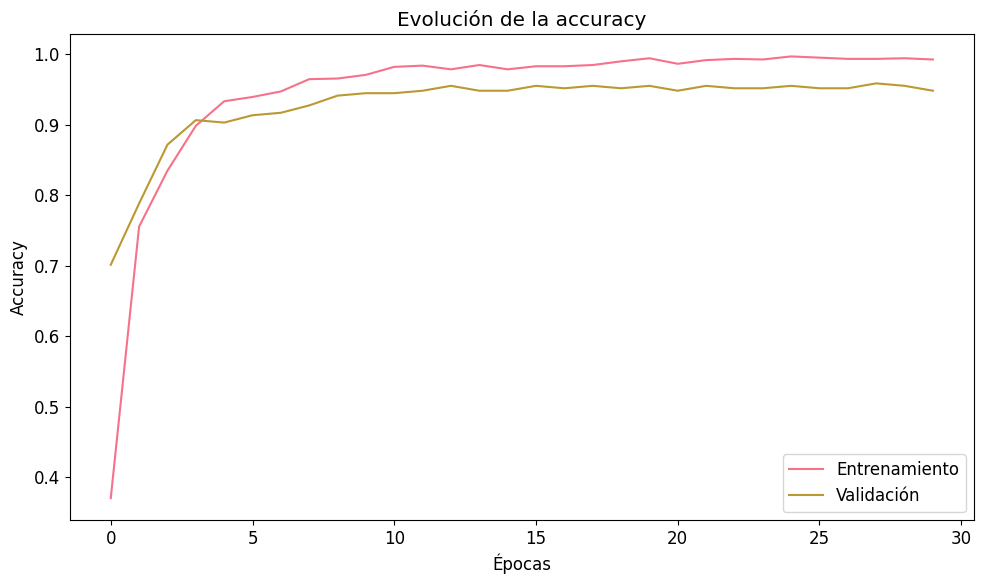

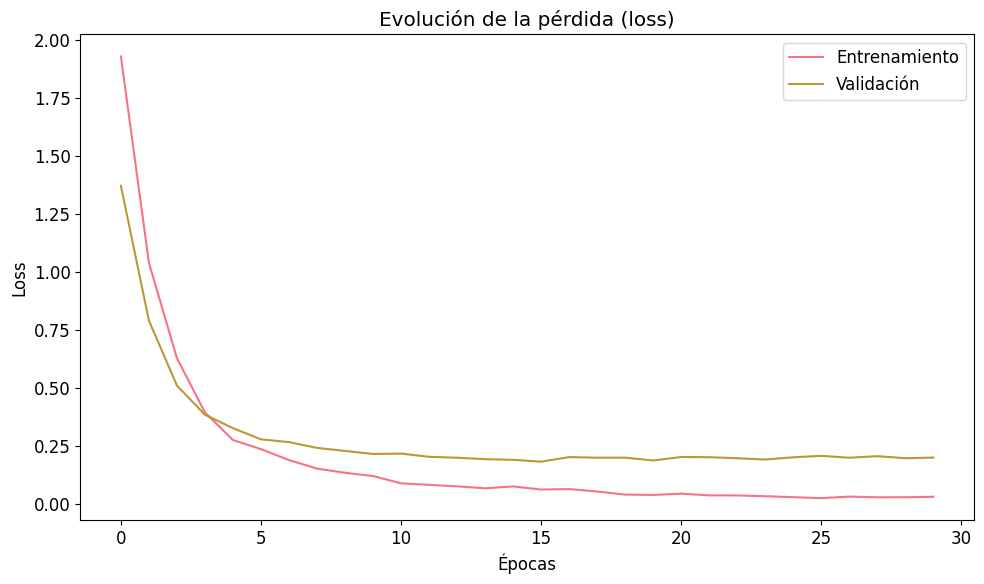

In [ ]:
import os
os.makedirs("Images", exist_ok=True)

# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la accuracy')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig("Images/04_digits_accuracy.png", bbox_inches='tight')
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Evolución de la pérdida (loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("Images/04_digits_loss.png", bbox_inches='tight')
plt.show()


## 7. Evaluación del modelo

Aquí evaluamos el desempeño de la red neuronal sobre el
conjunto de prueba, que el modelo nunca había visto durante el entrenamiento y reviso métricas globales y la matriz de confusión.


In [ ]:
# Evaluación directa con Keras
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Loss en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_acc:.4f}")


Loss en test: 0.1530
Accuracy en test: 0.9750


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Reporte de clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.95      1.00      0.97        35
           3       0.97      0.97      0.97        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.83      0.89        35
           9       1.00      1.00      1.00        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360



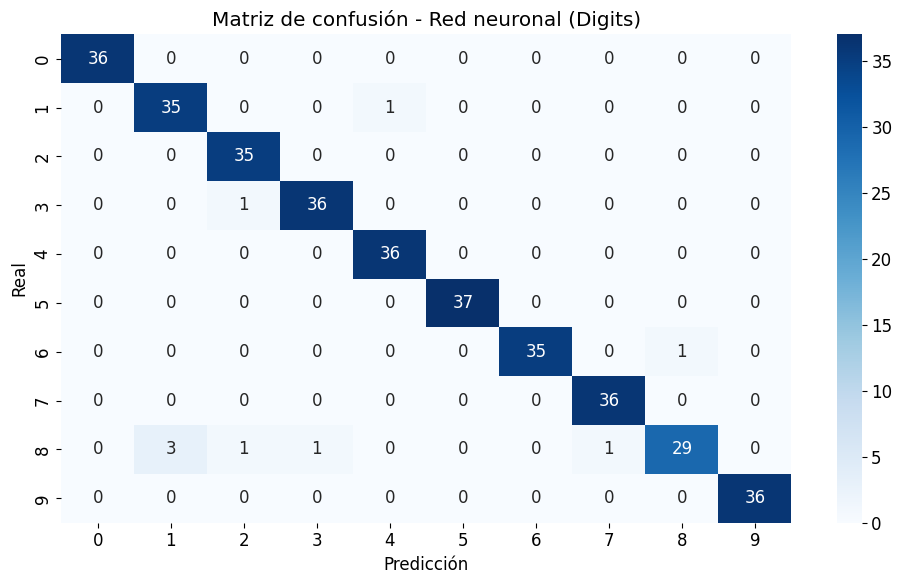

In [ ]:
# Predicciones en test
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Red neuronal (Digits)")
plt.tight_layout()
plt.savefig("Images/04_digits_confusion_matrix.png", bbox_inches='tight')
plt.show()


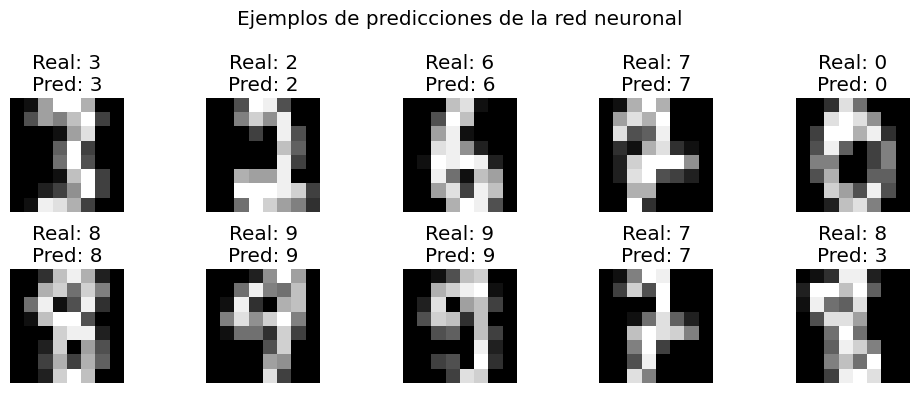

In [ ]:
# Mostrar algunos ejemplos de imágenes con sus predicciones
num_ejemplos = 10
indices = np.random.choice(len(X_test), num_ejemplos, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, (idx, ax) in enumerate(zip(indices, axes.flat)):
    imagen = X_test[idx].reshape(8, 8)
    ax.imshow(imagen, cmap='gray')
    ax.set_title(f"Real: {y_test[idx]}\nPred: {y_pred[idx]}")
    ax.axis('off')

plt.suptitle("Ejemplos de predicciones de la red neuronal")
plt.tight_layout()
plt.savefig("Images/04_digits_ejemplos_predicciones.png", bbox_inches='tight')
plt.show()


## 9. Conclusiones

La red neuronal implementada con TensorFlow/Keras fue capaz de aprender a
reconocer dígitos escritos a mano a partir del dataset `digits`. A través
de varias capas densas y la función de activación ReLU, el modelo logró
capturar patrones relevantes en los píxeles de cada imagen y generalizar
de manera adecuada sobre el conjunto de prueba.

Al observar las curvas de entrenamiento, se aprecia cómo la accuracy de
entrenamiento y validación convergen progresivamente, mientras que la
pérdida disminuye, indicando que el modelo está aprendiendo sin mostrar
un sobreajuste extremo. Los valores finales de accuracy en el conjunto de
prueba y la matriz de confusión confirman un desempeño sólido para un
modelo relativamente simple.

El desarrollo del ejercicio muestra cómo el Deep Learning permite trabajar
con datos más cercanos al mundo real, como imágenes, y resolver tareas de
clasificación de manera automática. A partir de esta base, se podrían
explorar arquitecturas más complejas (como redes convolucionales) y
mejorar aún más la precisión del modelo, ajustando hiperparámetros y
aumentando la profundidad de la red.


## 10 Guardar en Github

In [1]:
from google.colab import auth
auth.authenticate_user()

!git config --global user.email "liz.castillo@uees.edu.ec"
!git config --global user.name "Liz Eliana Castillo Zamora"


In [4]:
def save_to_github(notebook_name, commit_message="Actualizar notebook"):
    # Ir a /content y clonar el repo desde cero
    %cd /content
    !rm -rf UEES-IA-Semana1-Grupo3
    !git clone https://github.com/lizcastillo-glitch/UEES-IA-Semana1-Grupo3.git
    %cd UEES-IA-Semana1-Grupo3

    # Asegurar carpeta Notebooks
    !mkdir -p Notebooks

    # Copiar el notebook desde /content
    !cp f"/content/{notebook_name}" Notebooks/

    # Commit + push
    !git add .
    !git commit -m "{commit_message}"
    !git push origin main
    print(f"{notebook_name} guardado en GitHub correctamente")


In [5]:
save_to_github(
    "04_Deep_Learning_Intro.ipynb",
    "Añadir notebook 4 de Introducción a Deep Learning"
)


/content
Cloning into 'UEES-IA-Semana1-Grupo3'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 43 (delta 15), reused 6 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 610.92 KiB | 5.27 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/UEES-IA-Semana1-Grupo3
cp: cannot stat 'f/content/04_Deep_Learning_Intro.ipynb': No such file or directory
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
04_Deep_Learning_Intro.ipynb guardado en GitHub correctamente
